# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: ({len(cities)})")


Number of cities in the list: (604)


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?&q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        test = city_weather['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']  
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gazanjyk
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | kaeo
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rehli
Processing Record 6 of Set 1 | cabedelo
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | ketchikan
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | marsa matruh
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | bathsheba
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | alot
Processing Record 22 of Set 1 | wamba
Processi

Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | korla
Processing Record 45 of Set 4 | moron
Processing Record 46 of Set 4 | glenwood springs
Processing Record 47 of Set 4 | camocim
Processing Record 48 of Set 4 | mabaruma
Processing Record 49 of Set 4 | salalah
Processing Record 0 of Set 5 | madhugiri
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | atambua
Processing Record 3 of Set 5 | imbituba
Processing Record 4 of Set 5 | crab hill
City not found. Skipping...
Processing Record 5 of Set 5 | sultanpur
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | crawfordsville
Processing Record 8 of Set 5 | axim
Processing Record 9 of Set 5 | hailey
Processing Record 10 of Set 5 | sainte-marie
Processing Record 11 of Set 5 | esperance
Processing Record 12 of Set 5 | naze
Processing Record 13 of Set 5 | sanchor
Processing Record 14 of Set 5 | razole
Proces

Processing Record 30 of Set 8 | kayes
Processing Record 31 of Set 8 | hongjiang
Processing Record 32 of Set 8 | rivers
Processing Record 33 of Set 8 | peleduy
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | santa marta
Processing Record 36 of Set 8 | iranshahr
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | funadhoo
Processing Record 39 of Set 8 | jieshi
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | kharitonovo
Processing Record 42 of Set 8 | beira
Processing Record 43 of Set 8 | nabire
Processing Record 44 of Set 8 | raozan
City not found. Skipping...
Processing Record 45 of Set 8 | maceio
Processing Record 46 of Set 8 | ushirombo
Processing Record 47 of Set 8 | turukhansk
Processing Record 48 of Set 8 | virginia beach
Processing Record 49 of Set 8 | puerto escondido
Processing Record 0 of Set 9 | rockhampton
Processing Record 1 of Set 9 | bolshaya chernigovka
City not found. Skipping...
Processing Record 

Processing Record 21 of Set 12 | rafai
Processing Record 22 of Set 12 | ulaangom
Processing Record 23 of Set 12 | havoysund
Processing Record 24 of Set 12 | qianan
Processing Record 25 of Set 12 | nelidovo
Processing Record 26 of Set 12 | colomi
Processing Record 27 of Set 12 | souillac
Processing Record 28 of Set 12 | valparaiso
Processing Record 29 of Set 12 | kholm
Processing Record 30 of Set 12 | bosobolo
Processing Record 31 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 32 of Set 12 | prieska
Processing Record 33 of Set 12 | marcona
City not found. Skipping...
Processing Record 34 of Set 12 | yerbogachen
Processing Record 35 of Set 12 | anloga
Processing Record 36 of Set 12 | luena
Processing Record 37 of Set 12 | bac lieu
Processing Record 38 of Set 12 | mananjary
Processing Record 39 of Set 12 | elliot
Processing Record 40 of Set 12 | simbahan
Processing Record 41 of Set 12 | the valley
Processing Record 42 of Set 12 | san quintin
Processing Record 43 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gazanjyk,39.2446,55.5154,10.90,46,100,0.60,TM,1675806803
1,kaeo,-35.1000,173.7833,22.40,75,61,2.60,NZ,1675806531
2,punta arenas,-53.1500,-70.9167,16.06,55,75,7.20,CL,1675806804
3,rehli,23.6333,79.0833,15.00,29,0,3.13,IN,1675806806
4,cabedelo,-6.9811,-34.8339,27.37,67,90,5.13,BR,1675806807


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gazanjyk,39.2446,55.5154,10.90,46,100,0.60,TM,1675806803
1,kaeo,-35.1000,173.7833,22.40,75,61,2.60,NZ,1675806531
2,punta arenas,-53.1500,-70.9167,16.06,55,75,7.20,CL,1675806804
3,rehli,23.6333,79.0833,15.00,29,0,3.13,IN,1675806806
4,cabedelo,-6.9811,-34.8339,27.37,67,90,5.13,BR,1675806807


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

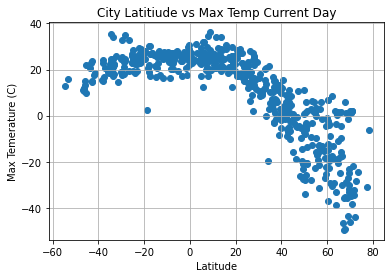

In [8]:
# Build scatter plot for latitude vs. temperature
fig1 = plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the ptother graph properties
plt.title('City Latitiude vs Max Temp Current Day')
plt.ylabel('Max Temerature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

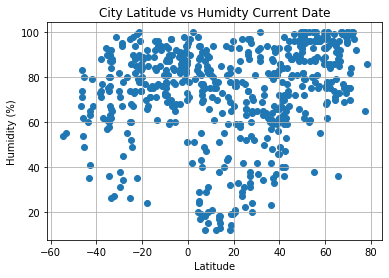

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title('City Latitude vs Humidty Current Date')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

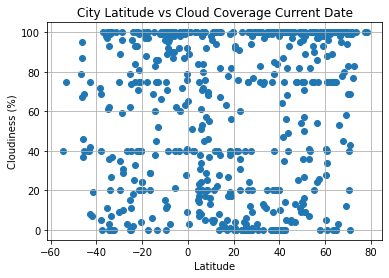

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.title('City Latitude vs Cloud Coverage Current Date')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

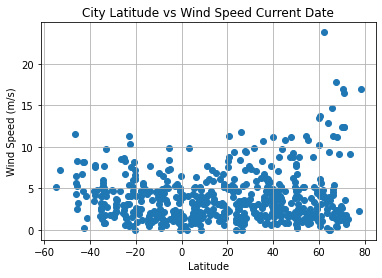

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed Current Date')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def weather_regress(x,y,x2,y2):
    plt.scatter(x,y)
    w_slope, w_intercept, w_r, w_p, w_se = linregress(x,y)
    regress_values = x * w_slope + w_intercept
    plt.plot(x,regress_values, color = "red")
    line_eq = "y = " + str(round(w_slope,2)) + "x + " + str(round(w_intercept,2))
    plt.annotate(line_eq,(x2,y2),fontsize=15, color="red")
    print(f"The R-Value for this example is {w_r**2}")
    

    
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gazanjyk,39.2446,55.5154,10.90,46,100,0.60,TM,1675806803
3,rehli,23.6333,79.0833,15.00,29,0,3.13,IN,1675806806
5,bethel,41.3712,-73.4140,3.21,60,0,4.63,US,1675806807
6,albany,42.6001,-73.9662,3.46,47,100,1.79,US,1675806808
9,ketchikan,55.3422,-131.6461,2.99,87,100,1.54,US,1675806811


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kaeo,-35.1000,173.7833,22.40,75,61,2.60,NZ,1675806531
2,punta arenas,-53.1500,-70.9167,16.06,55,75,7.20,CL,1675806804
4,cabedelo,-6.9811,-34.8339,27.37,67,90,5.13,BR,1675806807
7,rikitea,-23.1203,-134.9692,26.01,74,84,5.42,PF,1675806809
8,luderitz,-26.6481,15.1594,19.44,80,3,8.55,NaN,1675806707


###  Temperature vs. Latitude Linear Regression Plot

The R-Value for this example is 0.739422998347435


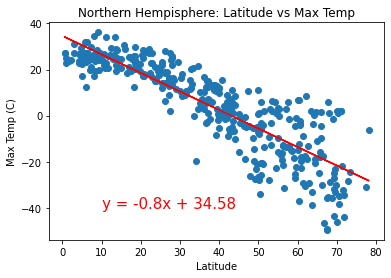

In [46]:
#Northern Hemisphere vs Max Temp 
weather_regress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 10,-40)
plt.title('Northern Hempisphere: Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

The R-Value for this example is 0.22382418399280668


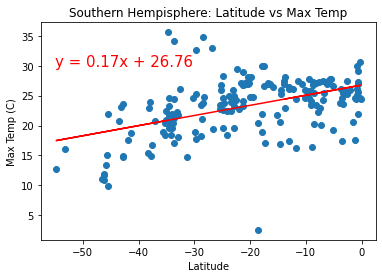

In [50]:
# Linear regression on Southern Hemisphere
weather_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -55, 30)
plt.title('Southern Hempisphere: Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

**Discussion about the linear relationship: This pair of linear regression models are comparing the relationship of a cities latitude vs a cities Max temp. The correlation between Latitude and Tempreture appears to generally be the closer latitude gets to 0, the higher the tempreture gets. This can be seen by the positive relationship between Latitude and Max temp in the Southern Hemisphere and the negative relationship between latitude and temp in the Northern Hemisphere. A notable observation is that the correlation appears to be a good amount stronger in northern latitudes vs the southern latitudes. 

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE